In [1]:
import pandas as pd

## Load data from excel file

In [15]:
df = pd.read_excel('../data/Production Data Versaline.xlsx')
print(df.columns)
df.head(2)

Index(['Date', 'Product', 'Planned start Time', 'Actual Start Time',
       'Stop Time', 'Total time', 'Startup Delay',
       'Breakdowns and other delays', 'Effective production time',
       'Operating Speed', 'Produced Qty', 'Rejects Qty', 'Mix Usage',
       'Mix Wastage', 'Mix yield', 'AR', 'PR', 'QR', 'OEE', 'Mix Per Stick',
       'Efficiency', 'Planned Qty'],
      dtype='object')


,Date,Product,Planned start Time,Actual Start Time,Stop Time,Total time,Startup Delay,Breakdowns and other delays,Effective production time,Operating Speed,...,Mix Usage,Mix Wastage,Mix yield,AR,PR,QR,OEE,Mix Per Stick,Efficiency,Planned Qty
0,2018-07-02,WB Chocolate,06:30:00,10:30:00,20:30:00,14.0,4.0,5.15,4.85,28880,...,7840.0,991.000,0.873597,0.346429,1.496754,0.873597,0.452976,0.0375,0.499675,NaN
1,2018-07-04,WB Vanilla,06:00:00,18:30:00,20:00:00,14.0,12.5,0.00,1.50,28880,...,1160.0,40.625,0.964978,0.107143,0.716049,0.964978,0.074033,0.0375,0.098710,NaN


In [16]:
# df = pd.read_excel('../data/Production Data Flexline.xlsx')
# print(df.columns)
# df.head(2)

## Select only the useful features
remove duplicate features such as start time and end time

In [17]:
useful_colomns = ["Product", "Total time", "Breakdowns and other delays", "Effective production time", "Produced Qty", "Rejects Qty", "Mix Usage", "Mix Wastage", "Mix yield", "Efficiency"]
df = df[useful_colomns]
df = df.rename(columns={"Breakdowns and other delays": "BD & other", "Effective production time": "Eff P time"})
df.head(2)

,Product,Total time,BD & other,Eff P time,Produced Qty,Rejects Qty,Mix Usage,Mix Wastage,Mix yield,Efficiency
0,WB Chocolate,14.0,5.15,4.85,182640,26426.666667,7840.0,991.000,0.873597,0.499675
1,WB Vanilla,14.0,0.00,1.50,29850,1083.333333,1160.0,40.625,0.964978,0.098710


In [18]:
df.Product.unique()

array(['WB Chocolate', 'WB Vanilla', 'JJ Necto', 'MM Watermelon',
       'MM Orange', 'WB Chock Shock', 'WB Berry', '2-Bar Vanilla Faluda',
       'JJ Cream Soda', 'JJ Orange Crush ', 'Ice Cake', 'Bubble Gumy',
       'JJ Creamsoda', 'WB Vnilla', 'Bubble Gummy', 'Ice cake',
       'WB Chocok Shock', 'JJ Orange Crush'], dtype=object)

## Rename Duplicates products with the correct name

In [19]:
df = df.replace({'Product': {"JJ Orange Crush ": "JJ Orange Crush", 
                             "WB Chocok Shock": "WB Chock Shock",
                            "Ice cake": "Ice Cake",
                            "Bubble Gumy":"Bubble Gummy", 
                            "WB Vnilla": "WB Vanilla",
                            "JJ Creamsoda": "JJ Cream Soda"}})
for product in df.Product.unique():
    print("{:15} = {}".format(product, df[df["Product"] == product]["Product"].count()))

WB Chocolate    = 62
WB Vanilla      = 74
JJ Necto        = 45
MM Watermelon   = 51
MM Orange       = 65
WB Chock Shock  = 30
WB Berry        = 16
2-Bar Vanilla Faluda = 65
JJ Cream Soda   = 15
JJ Orange Crush = 8
Ice Cake        = 5
Bubble Gummy    = 5


In [20]:
print("Number of rows: {}".format(df.Product.count()))
df.info()

Number of rows: 441
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       441 non-null    object 
 1   Total time    441 non-null    float64
 2   BD & other    441 non-null    float64
 3   Eff P time    441 non-null    float64
 4   Produced Qty  441 non-null    int64  
 5   Rejects Qty   440 non-null    float64
 6   Mix Usage     441 non-null    float64
 7   Mix Wastage   441 non-null    float64
 8   Mix yield     439 non-null    float64
 9   Efficiency    441 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 34.6+ KB


## Fill the NAN values with the mean of the colomn

In [24]:
df["Rejects Qty"] = df["Rejects Qty"].fillna(df["Rejects Qty"].mean())
df["Mix yield"] = df["Mix yield"].fillna(df["Mix yield"].mean())
# df.info()

In [25]:
group_by_products = df.groupby(by=['Product'])
product_data_avg = group_by_products.mean()
product_data_count = group_by_products.count()
# print(product_data_avg)
# print(product_data_count)

## Some plots using seaboarn
https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
    

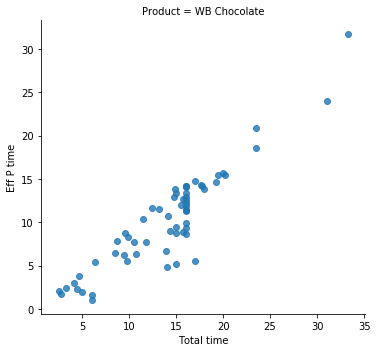

In [26]:
import seaborn as sns
%matplotlib inline

filtered_class = df[df['Product'] == 'WB Chocolate']
sns.lmplot("Total time", "Eff P time", data=filtered_class, fit_reg=False, col='Product', col_wrap=2)

frames = [df[df["Mix yield"].isna()], df[df["Rejects Qty"].isna()]]
pd.concat(frames)

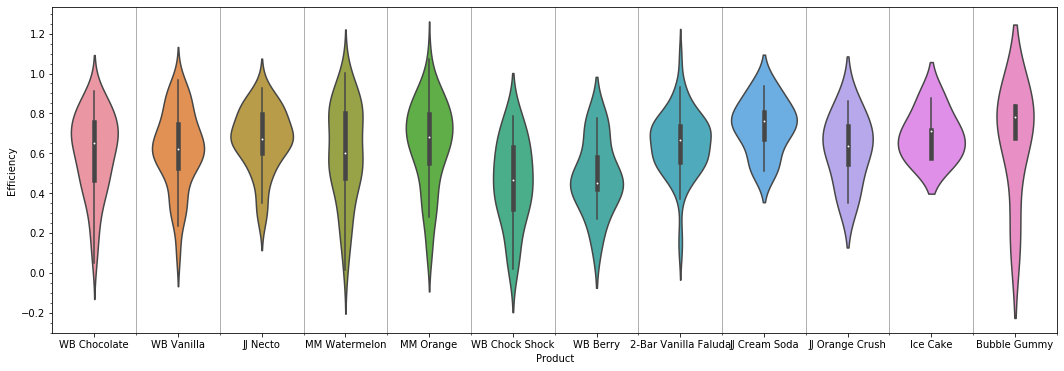

In [27]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,6))

ax1 = sns.violinplot('Product', "Efficiency", data=df)


ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

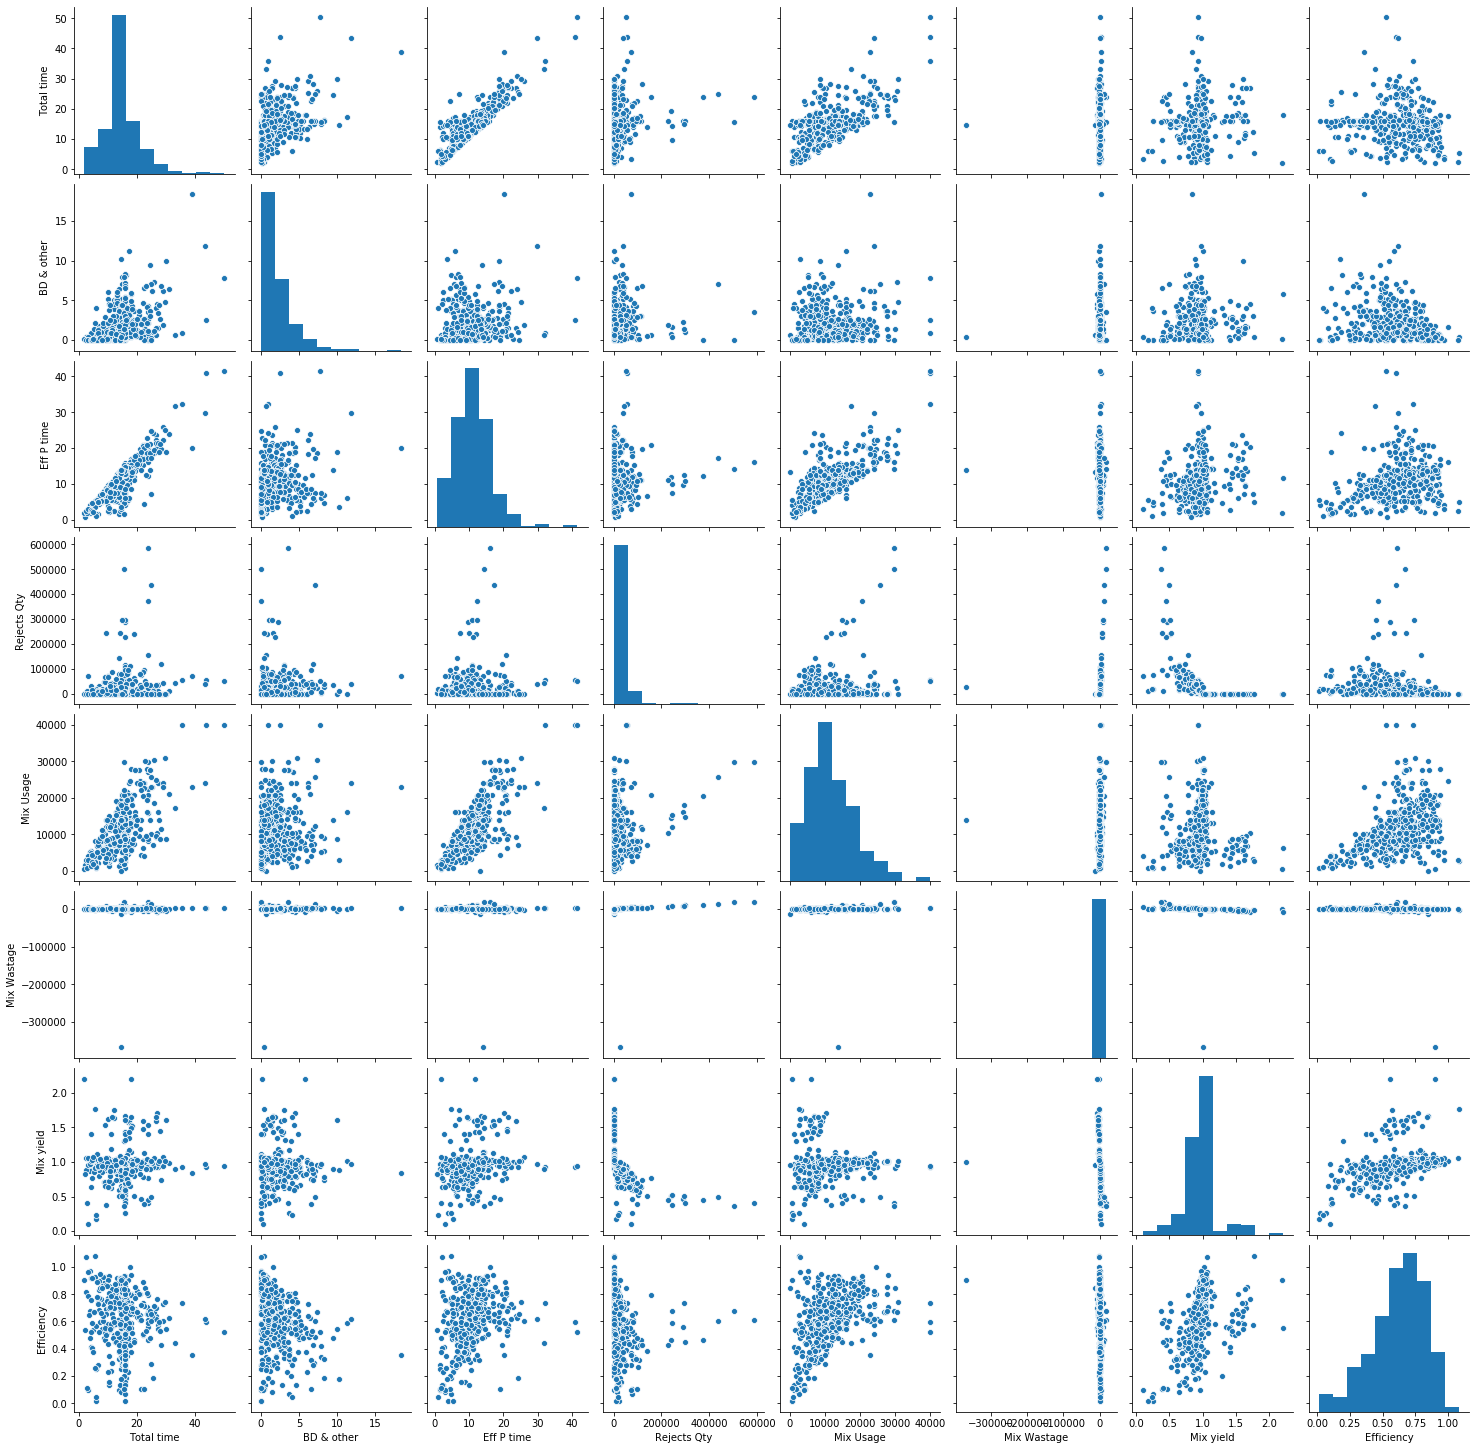

In [28]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])

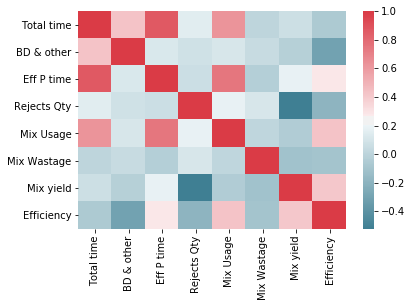

In [29]:
corr = df.loc[:,df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [30]:
for col in df.columns.values:
    print("{:20} = {}".format(col, df[col].nunique()))

Product              = 12
Total time           = 208
BD & other           = 261
Eff P time           = 386
Produced Qty         = 433
Rejects Qty          = 297
Mix Usage            = 253
Mix Wastage          = 435
Mix yield            = 439
Efficiency           = 441


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

y = df["Efficiency"]
X = df.drop(['Product', 'Efficiency'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [66]:
y_pred = regressor.predict(X_test)
print("Accuracy:", r2_score(y_test, y_pred))
# print("\nConfution Matrix: \n{}\n".format(confusion_matrix(y_test, y_pred)))
# print("\nClassification Report: \n{}\n".format(classification_report(y_test, y_pred)))

Accuracy: 0.7214192644194564


In [45]:
y_pred = regressor.predict([X.loc[1]])

In [46]:
print(y_pred)

[0.09871032]


In [47]:
y.loc[1]

0.0987103174603175

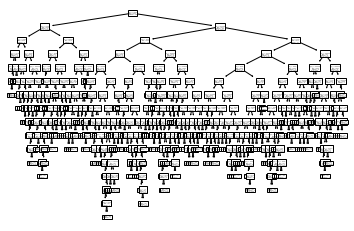

In [79]:
from sklearn import tree
t = tree.plot_tree(regressor)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.720106 to fit



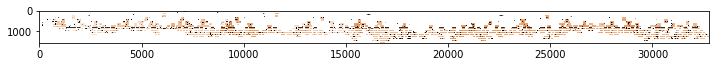

In [51]:
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

dot_data = io.StringIO()
plot_colomns = ["Total time", "Breakdowns and other delays", "Effective production time", "Produced Qty", "Rejects Qty", "Mix Usage", "Mix Wastage", "Mix yield"]

export_graphviz(regressor, out_file=dot_data, feature_names=plot_colomns, class_names=["Efficiency"], rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

In [71]:
import numpy as np
print(np.min(df["Efficiency"]))
print(np.max(df["Efficiency"]))
print(np.average(df["Efficiency"]))
print(np.var(df["Efficiency"]))

0.0144463293667572
1.08422471300031
0.6174142201712173
0.041447896769146904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf5df3d050>]],
      dtype=object)

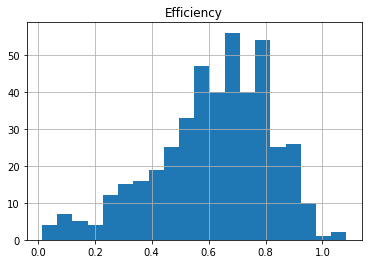

In [75]:
df.hist(bins=20, column="Efficiency")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf248abe90>,
      dtype=object)

<Figure size 1296x432 with 0 Axes>

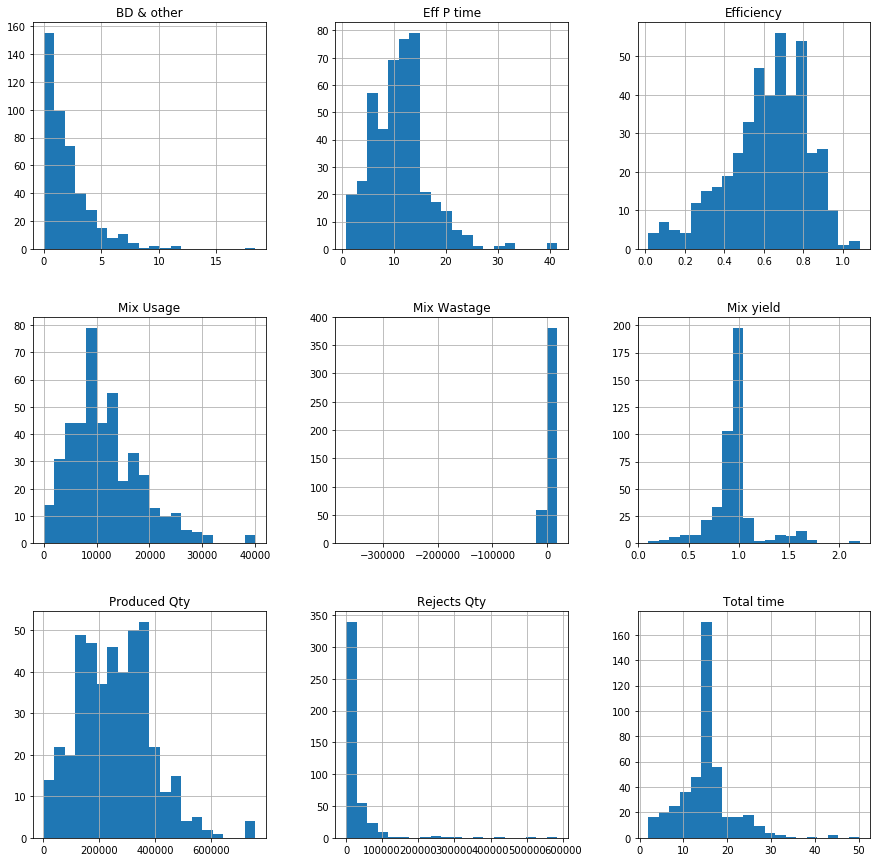

In [78]:
df.hist(bins=20, figsize=(15,15))